In [ ]:
# Instala ultralytics
%pip install ultralytics
# Importa libreria ultralytics
import ultralytics
# Revisa y visualiza las capacidades computacionales del computador virtual
ultralytics.checks()

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Proyecto2versionN/PartiturasMusicalesv8

/content/drive/MyDrive/Proyecto2versionN/PartiturasMusicalesv8


In [ ]:
!ls

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!yolo task=detect mode=train model=yolov8s-seg.pt data=/content/drive/MyDrive/Proyecto2versionN/PartiturasMusicalesv8/data.yaml epochs=50 imgsz=640 save_period=1

100% 22.8M/22.8M [00:00<00:00, 159MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/drive/MyDrive/Proyecto2versionN/PartiturasMusicalesv8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_bu

In [ ]:
!ls /content/drive/MyDrive/Proyecto2versionN/PartiturasMusicalesv8/runs/segment/train/weights

best.pt     epoch16.pt	epoch22.pt  epoch29.pt	epoch35.pt  epoch41.pt	epoch48.pt  epoch9.pt
epoch10.pt  epoch17.pt	epoch23.pt  epoch2.pt	epoch36.pt  epoch42.pt	epoch49.pt  last.pt
epoch11.pt  epoch18.pt	epoch24.pt  epoch30.pt	epoch37.pt  epoch43.pt	epoch4.pt
epoch12.pt  epoch19.pt	epoch25.pt  epoch31.pt	epoch38.pt  epoch44.pt	epoch5.pt
epoch13.pt  epoch1.pt	epoch26.pt  epoch32.pt	epoch39.pt  epoch45.pt	epoch6.pt
epoch14.pt  epoch20.pt	epoch27.pt  epoch33.pt	epoch3.pt   epoch46.pt	epoch7.pt
epoch15.pt  epoch21.pt	epoch28.pt  epoch34.pt	epoch40.pt  epoch47.pt	epoch8.pt


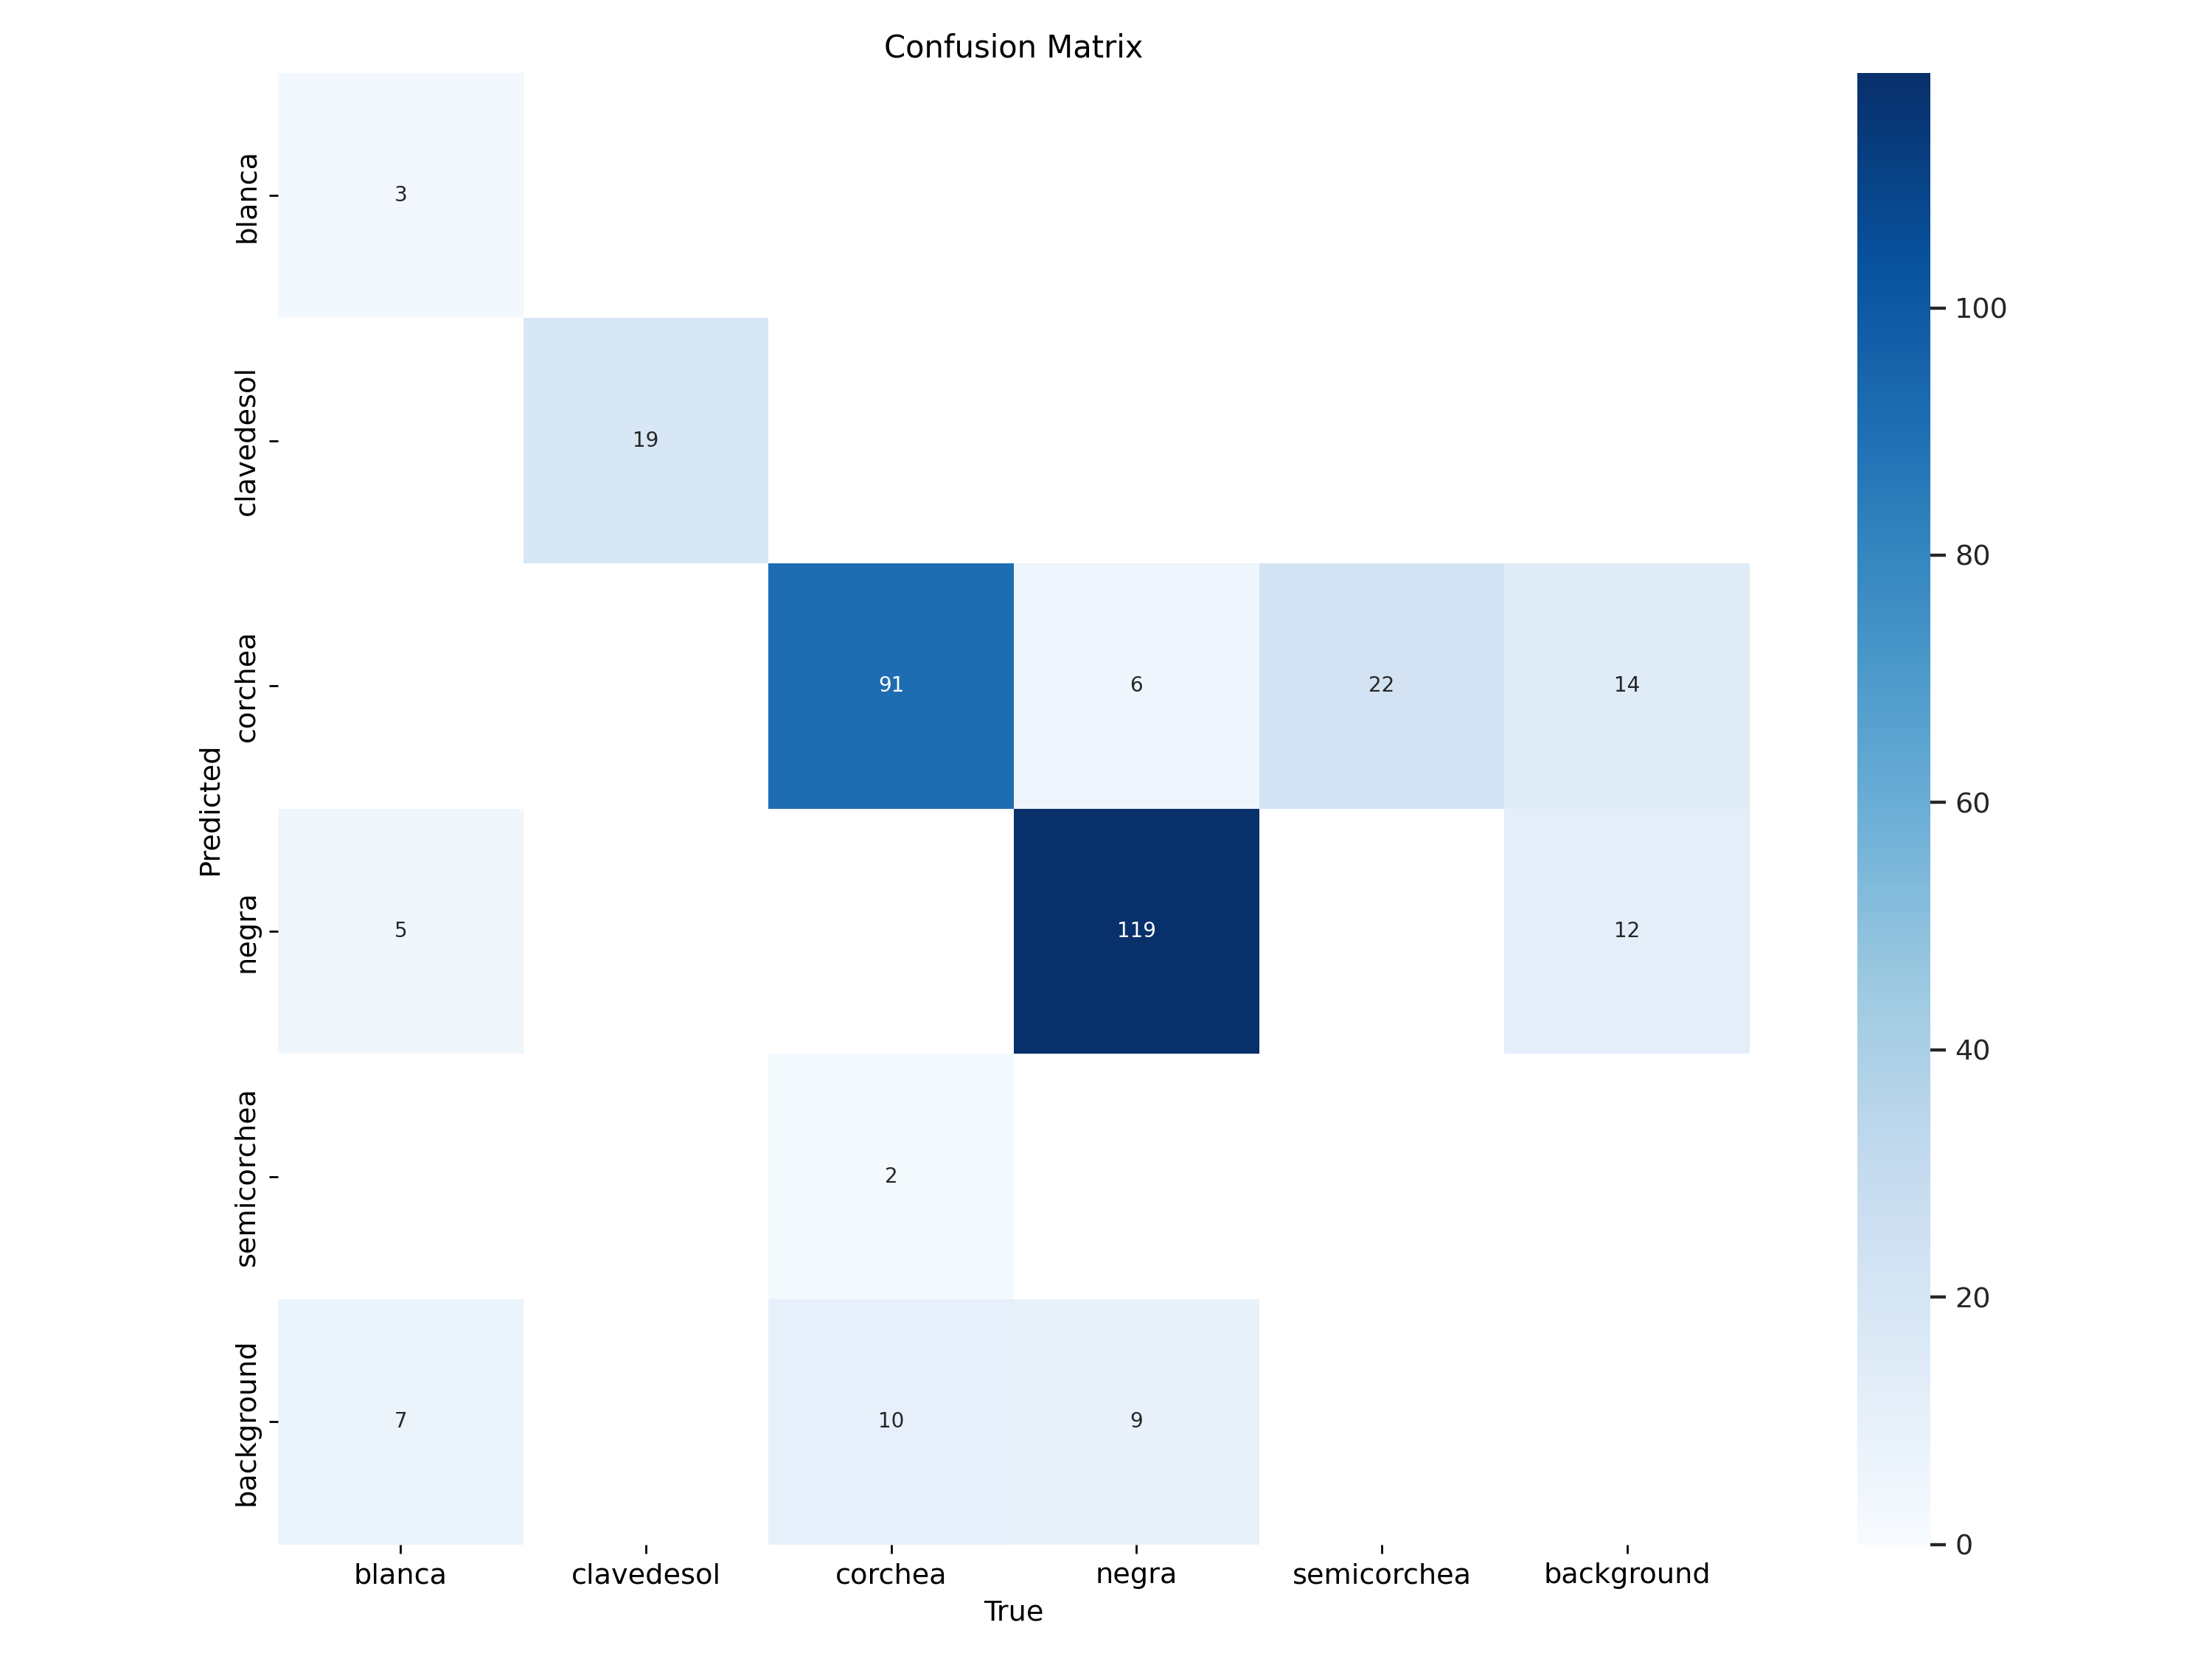

In [ ]:
Image(filename='/content/drive/MyDrive/Proyecto2versionN/PartiturasMusicalesv8/runs/segment/train/confusion_matrix.png', width=800)

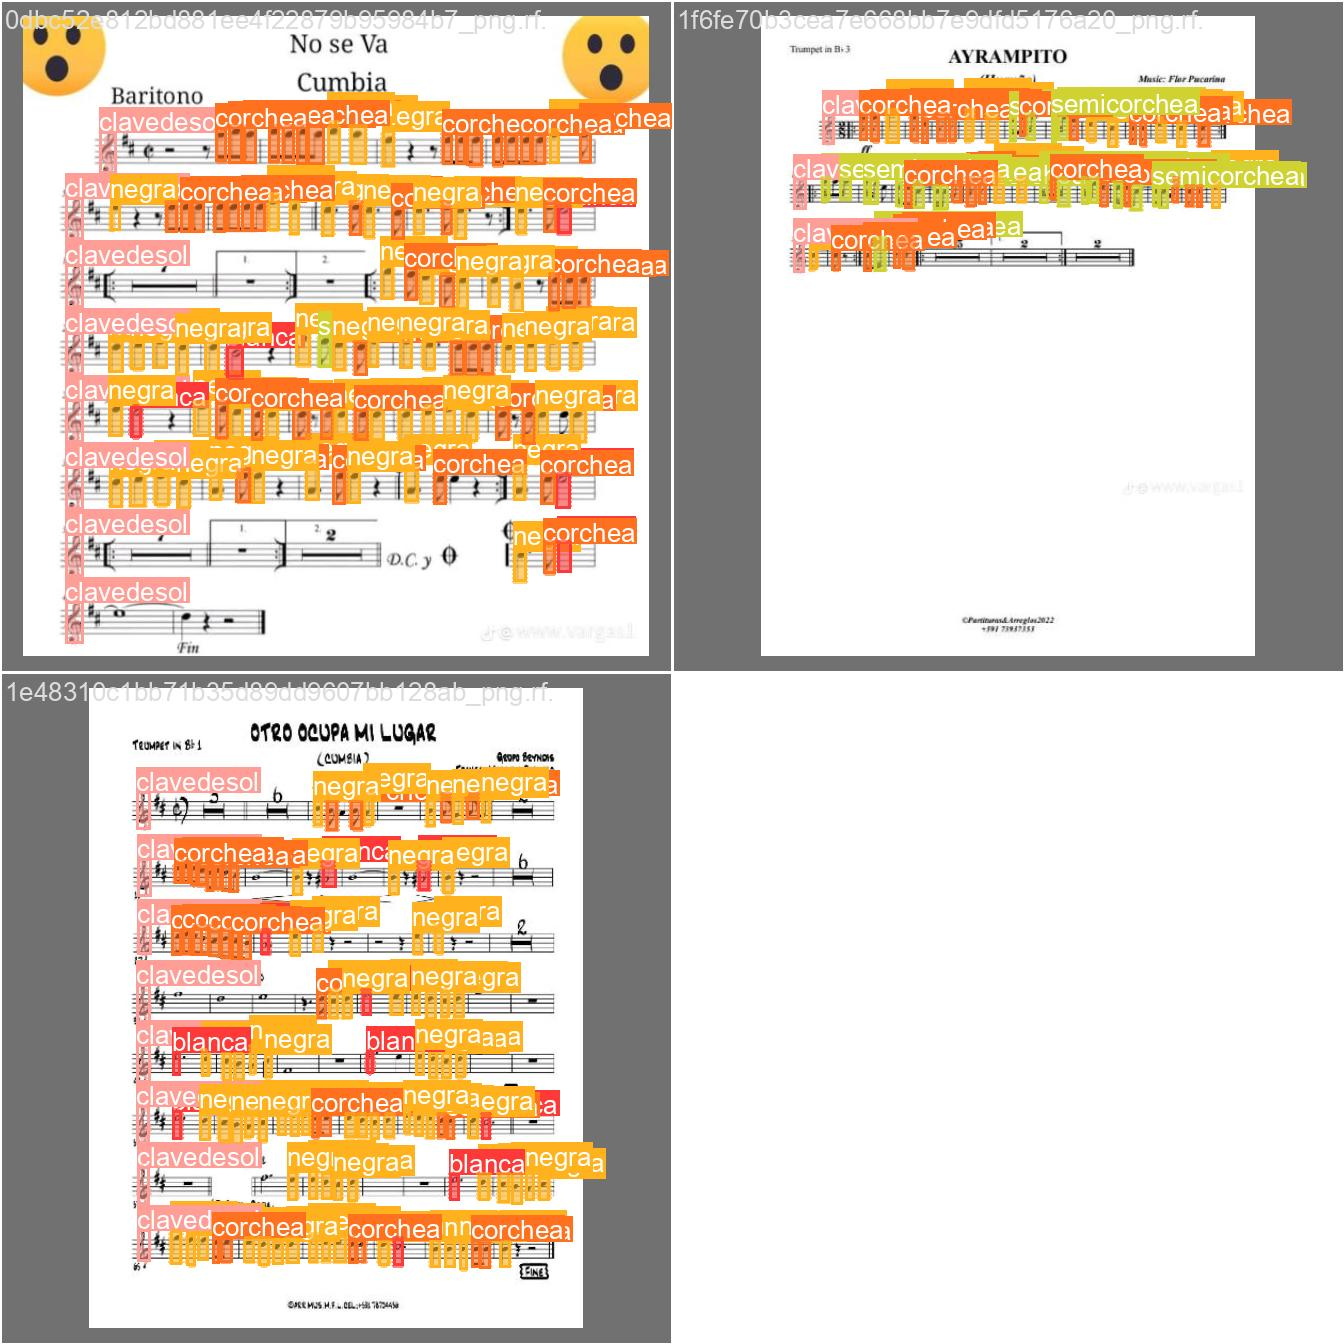

In [ ]:
Image(filename='/content/drive/MyDrive/Proyecto2versionN/PartiturasMusicalesv8/runs/segment/train/val_batch0_labels.jpg', width=800)

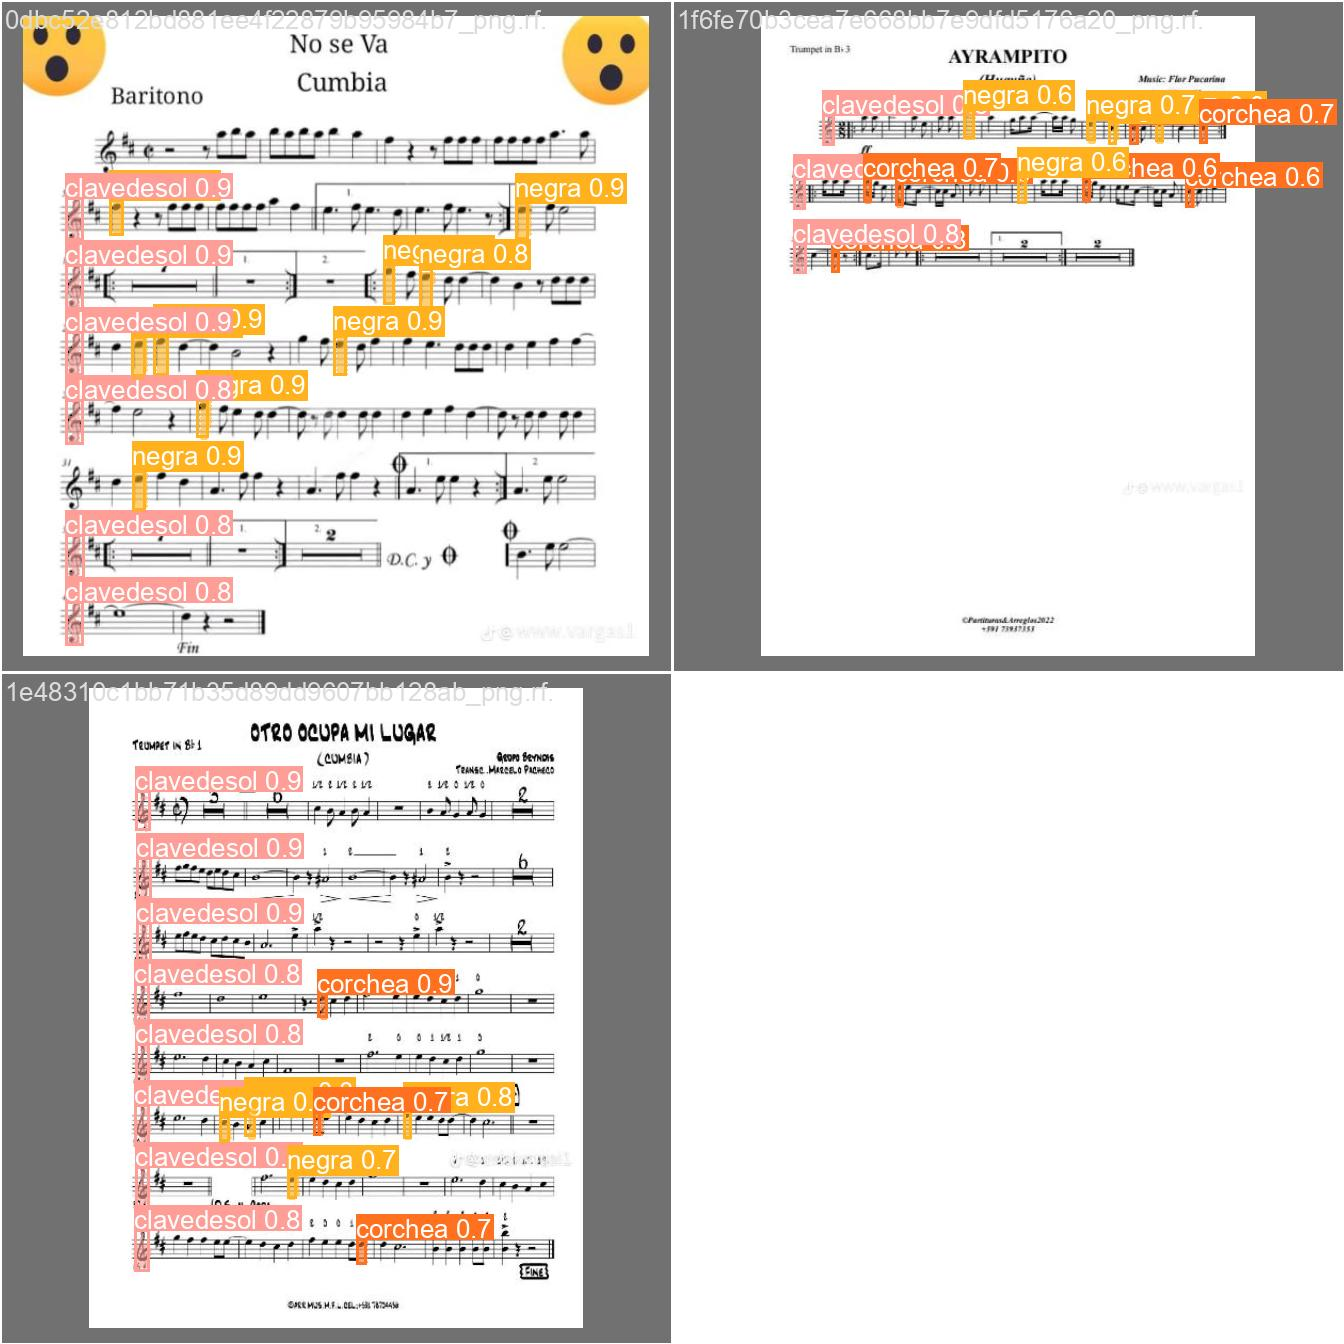

In [ ]:
Image(filename='/content/drive/MyDrive/Proyecto2versionN/PartiturasMusicalesv8/runs/segment/train/val_batch0_pred.jpg', width=800)

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Proyecto2versionN/PartiturasMusicalesv8/runs/segment/train/weights/best.pt data=/content/drive/MyDrive/Proyecto2versionN/PartiturasMusicalesv8/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11781535 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/MyDrive/Proyecto2versionN/PartiturasMusicalesv8/valid/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100% 3/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:03<00:00,  3.73s/it]
                   all          3        293      0.633      0.623      0.695      0.345       0.51      0.507      0.499      0.214
                blanca          3         15      0.683      0.267       0.46      0.156      0.576      0.272      0.427      0.105
            clavedesol          3         19      0.954          1      0.995      0.677   

In [ ]:
/content/drive/MyDrive/Proyecto2versionN/PartiturasMusicalesv8/test/images/0739a53a74088b2f63ae2d4160dc81d7_png.rf.3a0d7449080a567145719347414ef6c5.jpg

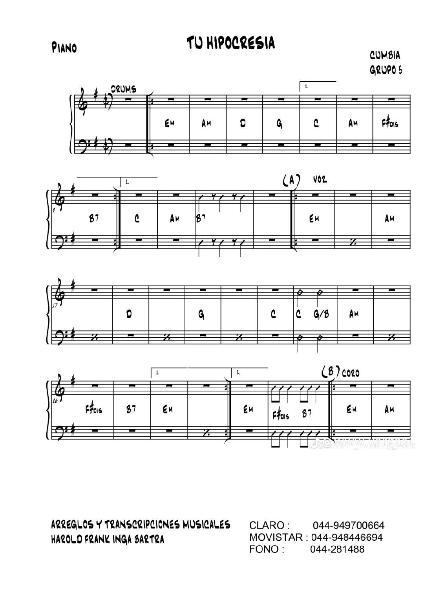

In [ ]:
import cv2
from IPython.display import Image
from ultralytics import YOLO
img_name='0739a53a74088b2f63ae2d4160dc81d7_png.rf.3a0d7449080a567145719347414ef6c5'
img =cv2.imread(f"/content/drive/MyDrive/Proyecto2versionN/PartiturasMusicalesv8/test/images/{img_name}.jpg")
# Mostrar la imagen en una ventana
Image(filename=f"/content/drive/MyDrive/Proyecto2versionN/PartiturasMusicalesv8/test/images/{img_name}.jpg", width=600)

In [ ]:
model= YOLO("/content/drive/MyDrive/Proyecto2versionN/PartiturasMusicalesv8/runs/segment/train/weights/best.pt")
pred= model.predict(img)[0]
pred= pred.plot()
cv2.imwrite(f"{img_name}.jpg", pred)


0: 640x480 2 blancas, 8 clavedesols, 9 corcheas, 6 negras, 145.7ms
Speed: 4.7ms preprocess, 145.7ms inference, 2518.2ms postprocess per image at shape (1, 3, 640, 480)


True

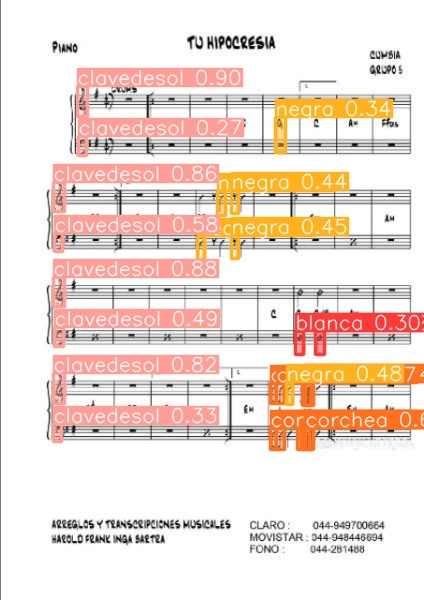

In [ ]:
Image(filename=f"/content/drive/MyDrive/Proyecto2versionN/PartiturasMusicalesv8/{img_name}.jpg", width=800)

In [ ]:
!yolo export model='/content/drive/MyDrive/Proyecto2versionN/PartiturasMusicalesv8/runs/segment/train/weights/best.pt' format=tflite imgsz=640

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s-seg summary (fused): 195 layers, 11781535 parameters, 0 gradients, 42.4 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/Proyecto2versionN/PartiturasMusicalesv8/runs/segment/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 41, 8400), (1, 32, 160, 160)) (22.8 MB)
2024-04-24 14:24:52.640745: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 14:24:52.640794: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 14:24:52.642621: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when

In [ ]:
!ls /content/drive/MyDrive/Proyecto2versionN/PartiturasMusicalesv8/runs/segment/train/weights/best_saved_model

assets		     best_full_integer_quant.tflite  fingerprint.pb  variables
best_float16.tflite  best_int8.tflite		     metadata.yaml
best_float32.tflite  best_integer_quant.tflite	     saved_model.pb
